<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example%20Cross%20Entropy%20Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

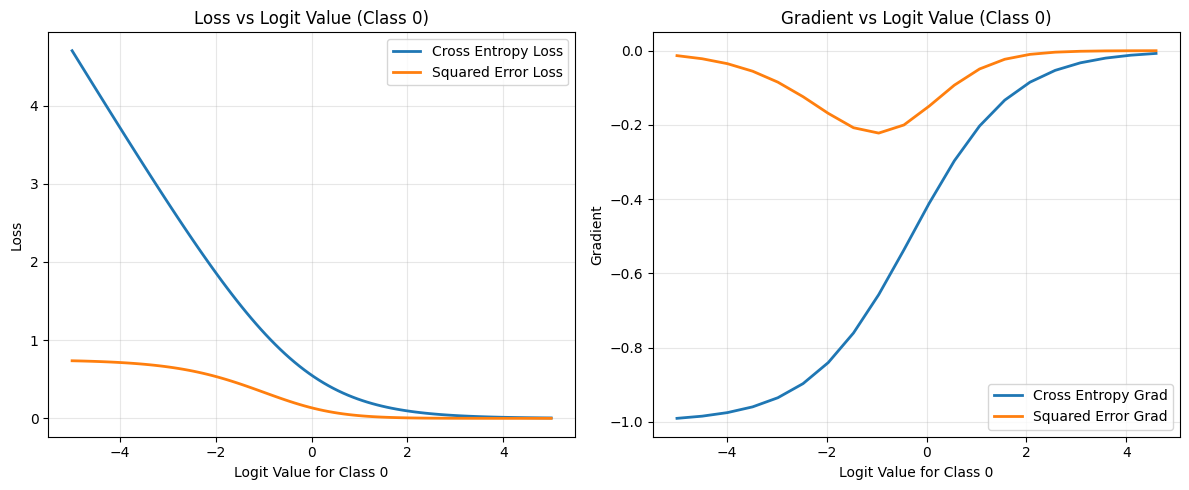

Demonstration of Confidence in Predictions:

Case 1: High Confidence Correct Prediction
Logits: [ 5. -2. -2.]
Probabilities: [9.98179556e-01 9.10221936e-04 9.10221936e-04]
Cross Entropy Loss: 0.002
Squared Error Loss: 0.000

Case 2: Low Confidence Correct Prediction
Logits: [1. 0. 0.]
Probabilities: [0.57611688 0.21194156 0.21194156]
Cross Entropy Loss: 0.551
Squared Error Loss: 0.135

Case 3: High Confidence Wrong Prediction
Logits: [-2.  5. -2.]
Probabilities: [9.10221936e-04 9.98179556e-01 9.10221936e-04]
Cross Entropy Loss: 7.002
Squared Error Loss: 0.997


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax
import math

def cross_entropy_loss(y_true, y_pred):
    """
    Calculate Cross Entropy Loss
    y_true: true labels (one-hot encoded)
    y_pred: predicted probabilities
    """
    return -np.sum(y_true * np.log(y_pred + 1e-15))

def squared_error_loss(y_true, y_pred):
    """
    Calculate Squared Error Loss
    y_true: true labels (one-hot encoded)
    y_pred: predicted probabilities
    """
    return 0.5 * np.sum((y_true - y_pred)**2)

def softmax_with_temperature(logits, temperature=1.0):
    """
    Softmax with temperature scaling
    """
    exp_logits = np.exp((logits - np.max(logits)) / temperature)
    return exp_logits / np.sum(exp_logits)

# Create sample data for a 3-class classification problem
true_labels = np.array([1, 0, 0])  # True class is 0
logits_range = np.linspace(-5, 5, 100)

# Initialize arrays to store loss values
cross_entropy_losses = []
squared_error_losses = []

# Calculate losses for different predicted probabilities
for logit in logits_range:
    # Create logits for 3 classes (varying first class)
    current_logits = np.array([logit, -1, -1])
    predicted_probs = softmax(current_logits)

    ce_loss = cross_entropy_loss(true_labels, predicted_probs)
    se_loss = squared_error_loss(true_labels, predicted_probs)

    cross_entropy_losses.append(ce_loss)
    squared_error_losses.append(se_loss)

# Plot the comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(logits_range, cross_entropy_losses, label='Cross Entropy Loss', linewidth=2)
plt.plot(logits_range, squared_error_losses, label='Squared Error Loss', linewidth=2)
plt.title('Loss vs Logit Value (Class 0)')
plt.xlabel('Logit Value for Class 0')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Show gradient behavior
def calculate_gradient_softmax_ce(y_true, logits):
    """
    Calculate gradient of CE loss w.r.t. logits
    """
    probs = softmax(logits)
    return probs - y_true

def calculate_gradient_softmax_se(y_true, logits):
    """
    Calculate gradient of SE loss w.r.t. logits
    """
    probs = softmax(logits)
    dL_dprobs = probs - y_true  # Gradient of loss w.r.t. probabilities
    # Jacobian of softmax
    s = probs.reshape(-1, 1)
    jacobian = np.diagflat(s) - np.dot(s, s.T)
    # Chain rule
    return np.dot(jacobian, dL_dprobs)

# Calculate gradients
grad_ce_list = []
grad_se_list = []

for logit in logits_range[::5]:  # Sample for efficiency
    current_logits = np.array([logit, -1, -1])
    grad_ce = calculate_gradient_softmax_ce(true_labels, current_logits)
    grad_se = calculate_gradient_softmax_se(true_labels, current_logits)

    grad_ce_list.append(grad_ce[0])
    grad_se_list.append(grad_se[0])

plt.subplot(1, 2, 2)
plt.plot(logits_range[::5], grad_ce_list, label='Cross Entropy Grad', linewidth=2)
plt.plot(logits_range[::5], grad_se_list, label='Squared Error Grad', linewidth=2)
plt.title('Gradient vs Logit Value (Class 0)')
plt.xlabel('Logit Value for Class 0')
plt.ylabel('Gradient')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Demonstrate the "confidence" aspect
print("Demonstration of Confidence in Predictions:")
print("\nCase 1: High Confidence Correct Prediction")
high_conf_logits = np.array([5.0, -2.0, -2.0])
high_conf_probs = softmax(high_conf_logits)
print(f"Logits: {high_conf_logits}")
print(f"Probabilities: {high_conf_probs}")
print(f"Cross Entropy Loss: {cross_entropy_loss(true_labels, high_conf_probs):.3f}")
print(f"Squared Error Loss: {squared_error_loss(true_labels, high_conf_probs):.3f}")

print("\nCase 2: Low Confidence Correct Prediction")
low_conf_logits = np.array([1.0, 0.0, 0.0])
low_conf_probs = softmax(low_conf_logits)
print(f"Logits: {low_conf_logits}")
print(f"Probabilities: {low_conf_probs}")
print(f"Cross Entropy Loss: {cross_entropy_loss(true_labels, low_conf_probs):.3f}")
print(f"Squared Error Loss: {squared_error_loss(true_labels, low_conf_probs):.3f}")

print("\nCase 3: High Confidence Wrong Prediction")
wrong_conf_logits = np.array([-2.0, 5.0, -2.0])
wrong_conf_probs = softmax(wrong_conf_logits)
print(f"Logits: {wrong_conf_logits}")
print(f"Probabilities: {wrong_conf_probs}")
print(f"Cross Entropy Loss: {cross_entropy_loss(true_labels, wrong_conf_probs):.3f}")
print(f"Squared Error Loss: {squared_error_loss(true_labels, wrong_conf_probs):.3f}")